# Bruin Sports Analytics - Data Journalism Fall 2022

Project: During the summer and winter soccer teams are allowed to buy and sell players to other teams.  What direct impact does spending money in the transfer market have on the success of teams in European soccer? We are going to determine success based on the placement in league, trophies won, and goals scored/conceded. 

In [2]:
# Import all of the packages for data exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

Introduction: talk about transfer market and how clubs can afford players
    Winning trophies means more money --> money spent in tranfer market --> 
    buy good players --> team wins --> more money
    
    
Leagues we want to analyze: Premier League, La Liga, Serie A, Bundesliga (maybe Ligue 1)


** Maybe do separate graphs for each one of the leagues? Some leagues might be more money dependent than others? --> could use gganimate for different leagues? or maybe FacetGrid for 4 of the leagues
    Maybe correlation graphs to show how much money affects placement in league (the one with the highest correlation maybe just focus on that one?) 


Normal graph showing spending over past 10-20 seasons to average place in league
    display line of best fit (one for each league?)
       
       
Use gganimate to graph "place in league" vs. "transfer money" over multiple seasons
    would be cool to replace dots with team logos (depending on number of teams analyzing)
    Depending on number of seasons may need a facet graph
    

Maybe also look at goals for/against in the season

    
See if the transfers one year make an impact in later years
    Ex) got a transfer 2019-20 summmer then has a great season during the 2020-21 season
    Would probably use a facet grid or correlation heat map


Maybe try out scikit learn on placement in league based on spending (this season maybe???) 




# Importing the Data

In [10]:
# Import data sets for Correlation Matrix & Scatter Plot

prem_data = pd.read_csv('Prem_Data_Set.csv')
corr_data_set = pd.read_csv("Corr_Prem_Sheet.csv")

# Correlation Heat Map - Expenditure

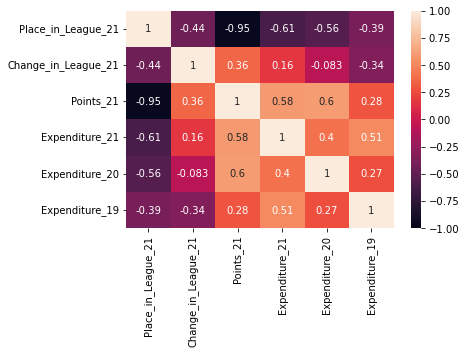

In [4]:
corr_select_21 = corr_data_set[["Place_in_League_21", "Change_in_League_21", "Points_21", "Expenditure_21", "Expenditure_20", "Expenditure_19"]] 
sns.heatmap(corr_select_21.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

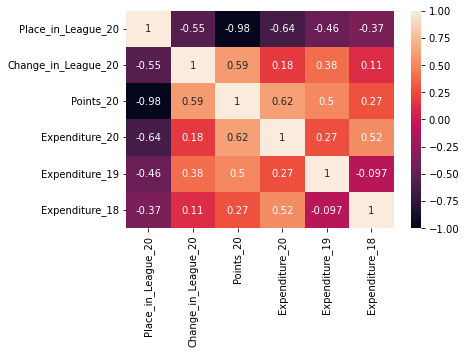

In [5]:
corr_select_20 = corr_data_set[["Place_in_League_20", "Change_in_League_20", "Points_20", "Expenditure_20", "Expenditure_19", "Expenditure_18"]] 
sns.heatmap(corr_select_20.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

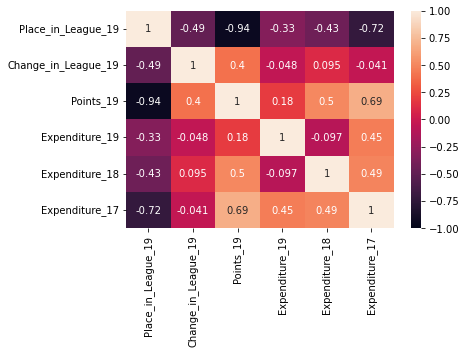

In [6]:
corr_select_19 = corr_data_set[["Place_in_League_19", "Change_in_League_19", "Points_19", "Expenditure_19", "Expenditure_18", "Expenditure_17"]] 
sns.heatmap(corr_select_19.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

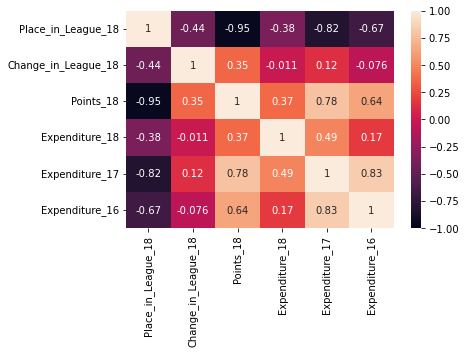

In [7]:
corr_select_18 = corr_data_set[["Place_in_League_18", "Change_in_League_18", "Points_18", "Expenditure_18", "Expenditure_17", "Expenditure_16"]] 
sns.heatmap(corr_select_18.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

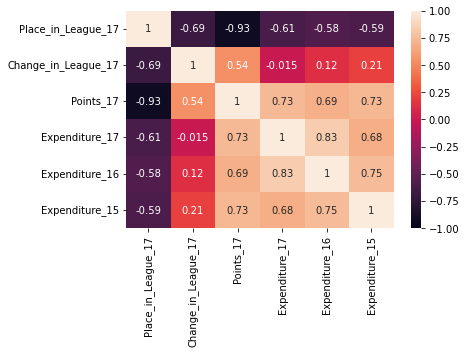

In [8]:
corr_select_17 = corr_data_set[["Place_in_League_17", "Change_in_League_17", "Points_17", "Expenditure_17", "Expenditure_16", "Expenditure_15"]] 
sns.heatmap(corr_select_17.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

# Correlation Heat Map - Team Balances

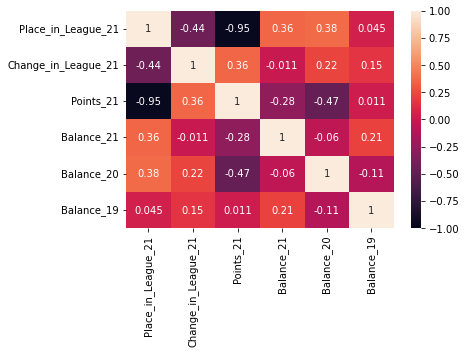

In [9]:
corr_select_21_balance = corr_data_set[["Place_in_League_21", "Change_in_League_21", "Points_21", "Balance_21", "Balance_20", "Balance_19"]] 
sns.heatmap(corr_select_21_balance.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

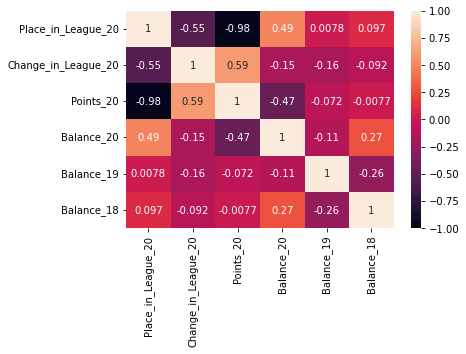

In [10]:
corr_select_20_balance = corr_data_set[["Place_in_League_20", "Change_in_League_20", "Points_20", "Balance_20", "Balance_19", "Balance_18"]] 
sns.heatmap(corr_select_20_balance.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

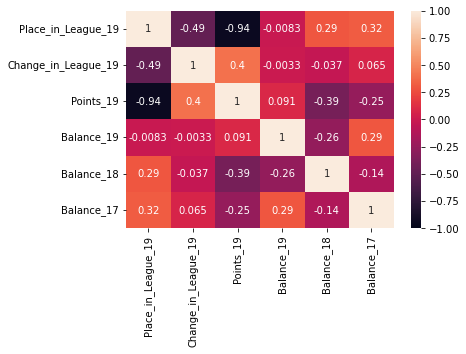

In [11]:
corr_select_19_balance = corr_data_set[["Place_in_League_19", "Change_in_League_19", "Points_19", "Balance_19", "Balance_18", "Balance_17"]] 
sns.heatmap(corr_select_19_balance.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

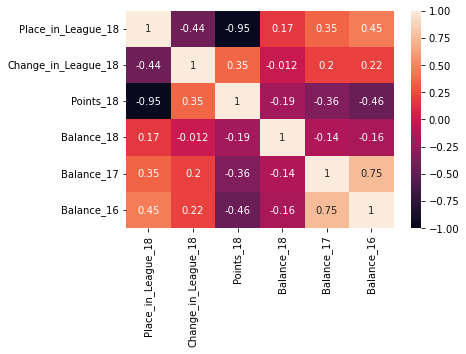

In [12]:
corr_select_18_balance = corr_data_set[["Place_in_League_18", "Change_in_League_18", "Points_18", "Balance_18", "Balance_17", "Balance_16"]] 
sns.heatmap(corr_select_18_balance.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

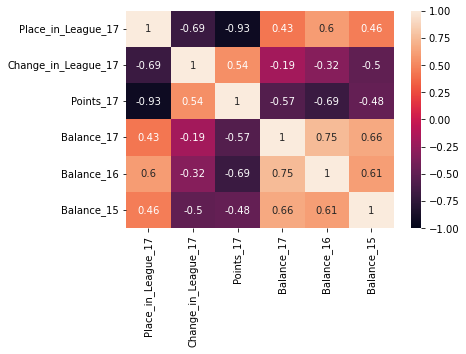

In [13]:
corr_select_17_balance = corr_data_set[["Place_in_League_17", "Change_in_League_17", "Points_17", "Balance_17", "Balance_16", "Balance_15"]] 
sns.heatmap(corr_select_17_balance.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

# Other Graphics

C:\Users\derek\AppData\Local\Temp\ipykernel_26308\3124620068.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_vars.corr(), dtype=np.bool)


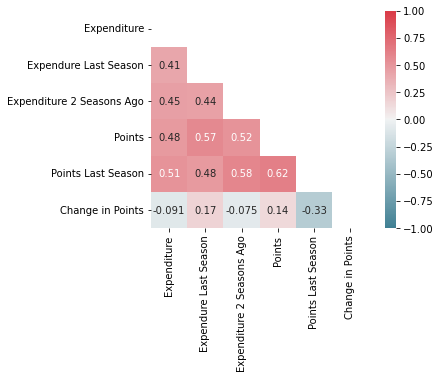

In [14]:
corr_vars = prem_data[["Expenditure", "Expenditure_Year_Ago", "Expenditure_2_Year_Ago", "Points", "Points_Last_Season", "Change_in_points"]] 
corr_vars.dropna()

mask = np.zeros_like(corr_vars.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plot = sns.heatmap(corr_vars.corr(), vmin=-1, vmax=1, annot=True, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

ticks = np.arange(.5,6,1)
plot.set_xticks(ticks)
plot.set_yticks(ticks)
labels = ["Expenditure", "Expendure Last Season", "Expenditure 2 Seasons Ago", "Points", "Points Last Season", "Change in Points"]
plot.set_xticklabels(labels)
plot.set_yticklabels(labels)

plt.show()

# Machine Learning - Expenditure & Points

In [12]:
from sklearn import linear_model
import statsmodels.api as sm
new = prem_data.dropna()

In [30]:
this_season = pd.read_csv("22_Season.csv", index_col=0)
this_season.dropna()

x = new[['Points_Last_Season', 'Expenditure_Year_Ago']]
y = new['Points']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(this_season) 
 
print_model = model.summary()
print(print_model)
print(predictions)

Intercept: 
 18.277523226417365
Coefficients: 
 [0.49298117 0.10231502]
                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     58.78
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           8.30e-18
Time:                        12:46:51   Log-Likelihood:                -417.69
No. Observations:                 107   AIC:                             841.4
Df Residuals:                     104   BIC:                             849.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

C:\Users\derek\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


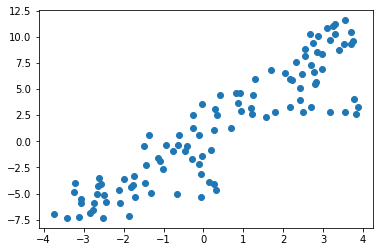

In [57]:
from sklearn.manifold import TSNE
model_tsne = TSNE(learning_rate = 100) 
transformed = model_tsne.fit_transform(new[['Points', 'Expenditure_Year_Ago']])
plt.scatter(transformed[:,0], transformed[:,1])

In [33]:
this_season["Predicted_Points"] = 18.2 + (this_season.Expenditure_Last_Season * 0.102) + (this_season.Points_Last_Season * 0.492)
this_season.sort_values(by = ["Predicted_Points"], inplace = True, ascending = False)

this_season["Predicted_Points"]

Club
Manchester City            78.12380
Liverpool FC               72.33800
Arsenal FC                 69.22280
Chelsea                    66.64400
Tottenham Hotspur          62.91380
Manchester United          61.22000
Newcastle United           55.61900
Aston Villa                53.57960
West Ham United            53.44280
Brighton & Hove Albion     50.94200
Leicester City             50.67920
Crystal Palace             50.54924
Wolverhampton Wanderers    47.12720
Brentford FC               44.57540
Leeds United               42.90380
Southampton FC             42.27620
Everton FC                 41.37620
Nottingham Forest               NaN
Fulham FC                       NaN
AFC Bournemouth                 NaN
Name: Predicted_Points, dtype: float64

# Machine Learning - Expenditure & Place in League

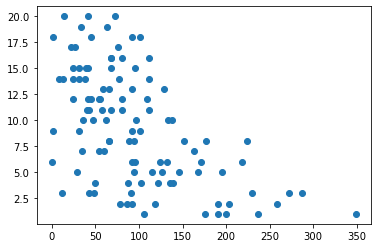

In [41]:
plt.scatter(new["Expenditure_Year_Ago"], new["Place_in_League"])

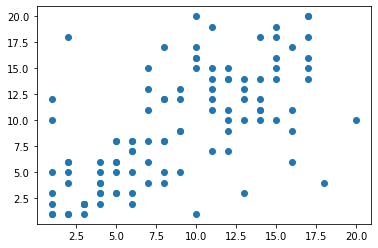

In [40]:
plt.scatter(new["Place_League_Last_Year"], new["Place_in_League"])

In [13]:
x = new[['Place_League_Last_Year', 'Expenditure_Year_Ago']]
y = new['Place_in_League']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

model = sm.OLS(y, x).fit()
predictions = model.predict(this_season) 
 
print_model = model.summary()
print(print_model)
print(predictions)

Intercept: 
 7.235659228693711
Coefficients: 
 [ 0.52156078 -0.02661457]


NameError: name 'this_season' is not defined

In [38]:
this_season["Place_in_League"] = 7 + (this_season.Expenditure_Last_Season * -0.0266) + (this_season.Place_Last_Season * 0.52)
this_season.sort_values(by = ["Place_in_League"], inplace = True)

this_season["Place_in_League"]

Club
Manchester City             3.825260
Arsenal FC                  5.147160
Chelsea                     5.421200
Liverpool FC                5.725800
Manchester United           6.342800
Tottenham Hotspur           6.529060
West Ham United             8.634360
Newcastle United            9.248700
Leicester City              9.361840
Brighton & Hove Albion      9.685000
Aston Villa                10.827320
Crystal Palace             10.962508
Wolverhampton Wanderers    11.199840
Brentford FC               12.783780
Southampton FC             13.653540
Leeds United               14.273260
Everton FC                 14.279940
Nottingham Forest                NaN
Fulham FC                        NaN
AFC Bournemouth                  NaN
Name: Place_in_League, dtype: float64

# Data Sets

In [29]:
new.head()

,Club,League,Season,Expenditure,Arrivals,Income,Departures,Balance,Expenditure_Year_Ago,Arrival_Year_Ago,Expenditure_2_Year_Ago,Place_in_League,Place_League_Last_Year,Change_in_League,Points,Points_Last_Season,Change_in_points,Wins,Goals_Diff
0,Arsenal FC,Premier League,21/22,184.14,12,$34.54m,20,-149.60,94.60,16.0,176.88,5,8.0,3.0,69,61.0,8,22,13
1,Aston Villa,Premier League,21/22,142.80,22,$139.70m,18,-3.10,111.49,12.0,175.45,14,11.0,-3.0,45,55.0,-10,13,-2
3,Brighton & Hove Albion,Premier League,21/22,82.50,26,$86.35m,29,3.85,31.35,28.0,67.91,9,16.0,7.0,51,41.0,10,12,-2
4,Burnley FC,Premier League,21/22,54.34,7,$44.55m,6,-9.79,1.21,6.0,26.24,18,17.0,-1.0,35,39.0,-4,7,-19
5,Chelsea FC,Premier League,21/22,129.80,21,$131.95m,22,2.15,271.92,29.0,49.50,3,4.0,1.0,74,67.0,7,21,43


In [35]:
this_season.head()

,Expenditure_Last_Season,Points_Last_Season,Place_Last_Season,Predicted_Points
Club,,,,
Manchester City,138.9,93.0,1.0,78.1238
Liverpool FC,87.0,92.0,2.0,72.3380
Arsenal FC,167.4,69.0,5.0,69.2228
Chelsea,118.0,74.0,3.0,66.6440
Tottenham Hotspur,95.9,71.0,4.0,62.9138
